# Imports

In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Aula 1 - Conhecendo os dados

In [37]:
MVL_PATH = 'https://raw.githubusercontent.com/alura-cursos/data-science-analise-exploratoria/main/Aula_0/ml-latest-small/ratings.csv'
ratings_df = pd.read_csv(MVL_PATH)

In [38]:
ratings_df.head(3)

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224


In [39]:
ratings_df.shape
#Número de linhas, número de colunas

(100836, 4)

In [40]:
ratings_df.columns = ['userId', 'movieId', 'ratingValue', 'timeStamp']
ratings_df.head(3)

,userId,movieId,ratingValue,timeStamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224


In [41]:
ratings_series = ratings_df['ratingValue']
ratings_series.head(3)

0    4.0
1    4.0
2    4.0
Name: ratingValue, dtype: float64

In [42]:
ratings_df.describe()

,userId,movieId,ratingValue,timeStamp
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


In [43]:
ratings_series.unique()

array([4. , 5. , 3. , 2. , 1. , 4.5, 3.5, 2.5, 0.5, 1.5])

In [44]:
#Conta quantas vezes um valor único foi registrado
ratings_series.value_counts() 

ratingValue
4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: count, dtype: int64

In [45]:
ratings_mvl_mean = ratings_series.mean()
print(f'Média de notas (geral): {round(ratings_mvl_mean, 3)}')

Média de notas (geral): 3.502


<Axes: ylabel='Frequency'>

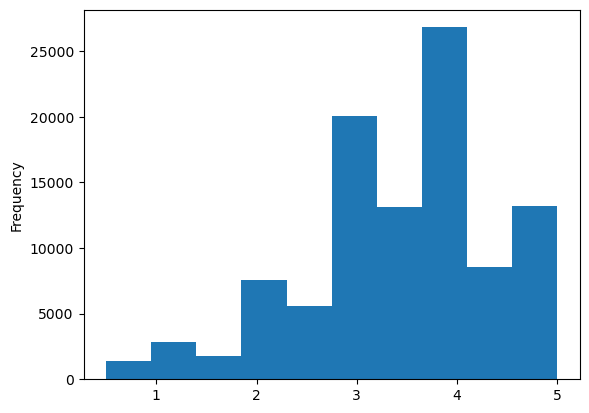

In [46]:
#histograma -> frequência (contagem de valores únicos)
ratings_series.plot(kind='hist')

In [47]:
ratings_mvl_median = ratings_series.median()
print(f'Mediana de notas (geral): {round(ratings_mvl_median, 3)}')

Mediana de notas (geral): 3.5


In [48]:
ratings_series.describe()

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: ratingValue, dtype: float64

<Axes: ylabel='ratingValue'>

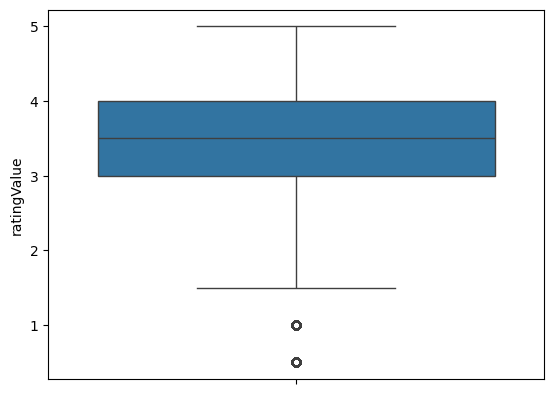

In [49]:
#boxplot -> distribuição por quartis e outliers
sns.boxplot(ratings_series)

## Dataframes

In [50]:
# Criando um DataFrame simples
#Keys como nome das colunas e values(lista) como valores das linhas
#Estrutura tabular de linhas e colunas
dados = {
    'Nome': ['Mirla', 'Ana', 'Daniel'],
   'Idade': [25, 30, 35],
    'Salario': [5000, 6000, 8000]
}
df = pd.DataFrame(dados)
df

,Nome,Idade,Salario
0,Mirla,25,5000
1,Ana,30,6000
2,Daniel,35,8000


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Nome     3 non-null      object
 1   Idade    3 non-null      int64 
 2   Salario  3 non-null      int64 
dtypes: int64(2), object(1)
memory usage: 204.0+ bytes


In [52]:
df['Salario'].mean()

6333.333333333333

In [53]:
#Series -> sequencia de valoes indexados ordenados
ages = pd.Series([45, 30, 45, 40, 25])
ages

0    45
1    30
2    45
3    40
4    25
dtype: int64

In [54]:
ages.index

RangeIndex(start=0, stop=5, step=1)

In [55]:
ages.sort_values()

4    25
1    30
3    40
0    45
2    45
dtype: int64

# Aula 2 - Analisando os dados

In [56]:
MOVIES_PATH = 'https://raw.githubusercontent.com/alura-cursos/data-science-analise-exploratoria/main/Aula_0/ml-latest-small/movies.csv'
movies_df = pd.read_csv(MOVIES_PATH)
movies_df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [57]:
ratings_df.head()

,userId,movieId,ratingValue,timeStamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [58]:
#Query ->  busca de dados em uma base
ratings_df.query("movieId == 1")['ratingValue'].mean()

3.9209302325581397

In [59]:
ratings_df.query("movieId == 2")['ratingValue'].mean()

3.4318181818181817

In [60]:
#Cria um "grupo" para valores únicos de id de filme
#Como um dict onde um id é a chave e os dados referentes são os valores
ratings_gbmovie_df = ratings_df.groupby('movieId')
ratings_by_movies_series = ratings_gbmovie_df['ratingValue'].mean()
ratings_by_movies_series.head()

movieId
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: ratingValue, dtype: float64

<Axes: ylabel='Frequency'>

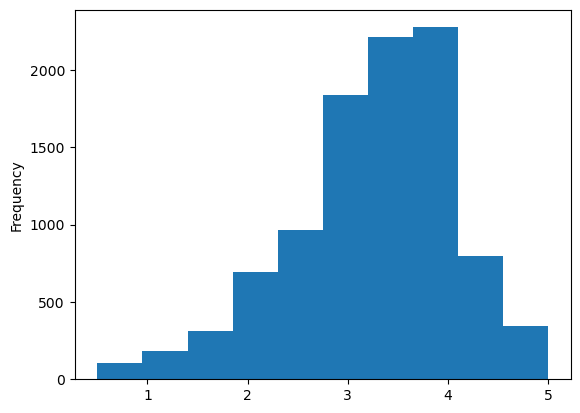

In [61]:
ratings_by_movies_series.plot(kind='hist')

<Axes: ylabel='ratingValue'>

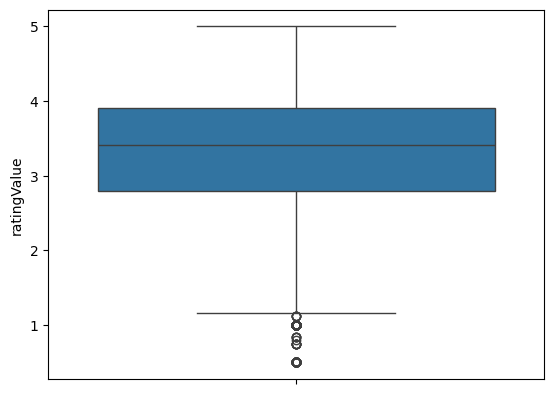

In [71]:
sns.boxplot(ratings_by_movies_series)

In [74]:
ratings_by_movies_series.describe()

count    9724.000000
mean        3.262448
std         0.869874
min         0.500000
25%         2.800000
50%         3.416667
75%         3.911765
max         5.000000
Name: ratingValue, dtype: float64

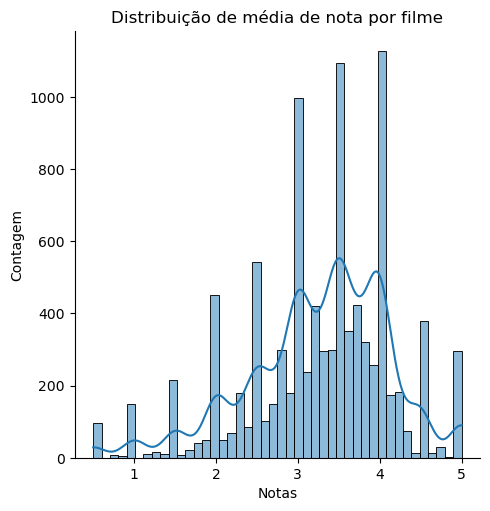

In [82]:
#distribuição das médias de notas por filme
#kde -> curva de distribuição
#O seaborn implementa o matplotlib, é possível alterar o gráfico com plt
sns.displot(ratings_by_movies_series, kde=True) #cria novo gráfico
plt.title('Distribuição de média de nota por filme') #altera gráfico atual
plt.xlabel('Notas') #altera o titulo de x
plt.ylabel('Contagem') # '' y
plt.show() #exibe

## pd.DataFrame.query()

In [64]:
sales_df = pd.read_csv('./serenatto_2sem_2023.csv')
sales_df.query("produto == 'Tiramisù'").head()

,id,data,produto,valor,metodo_pagamento
1,2721,2023-07-02,Tiramisù,10.0,Cartão de Débito
2,2722,2023-07-02,Tiramisù,10.0,Cartão de Crédito
15,2735,2023-07-06,Tiramisù,10.0,Cartão de Crédito
30,2750,2023-07-07,Tiramisù,10.0,Cartão de Débito
31,2751,2023-07-07,Tiramisù,10.0,Cartão de Débito


In [66]:
sales_df.query(
    "valor > 10 and metodo_pagamento != 'Dinheiro'"
).head()

,id,data,produto,valor,metodo_pagamento
0,2720,2023-07-01,Risoto de Funghi,13.0,Cartão de Débito
5,2725,2023-07-03,Salada Niçoise,11.0,PIX
7,2727,2023-07-04,Lasanha,11.5,PIX
8,2728,2023-07-04,Gnocchi,10.5,PIX
18,2738,2023-07-06,Salada Niçoise,11.0,Cartão de Débito


In [70]:
products_target = ['Café au lait', 'Espresso', 'Cappuccino']
#O operador @ permite utilizar uma variável externa a query - do python
#usada em consultas dinâmicas
sales_df.query(
    "produto in @products_target and metodo_pagamento == 'PIX'"
).head()

,id,data,produto,valor,metodo_pagamento
9,2729,2023-07-04,Espresso,2.5,PIX
42,2762,2023-07-10,Café au lait,4.0,PIX
64,2784,2023-07-14,Espresso,2.5,PIX
76,2796,2023-07-16,Café au lait,4.0,PIX
77,2797,2023-07-16,Café au lait,4.0,PIX
